<a href="https://colab.research.google.com/github/robertoricci/Analise-Financeira/blob/main/valuation_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valuation no Python

Um modelo de avaliação de ações, comumento chamado de Valuation, é um mecanismo que converte um conjunto de previsões (ou observações) de uma série de variáveis da empresa e variáveis econômicas em uma previsão do valor de mercado da ação da companhia.

Os insumos de um modelo de avaliação têm o caráter de variáveis econômicas, por exemplo, lucros futuros, dividendos, variação dos lucros, e dentre outras variáveis.

O resultado encontrado é o valor de mercado esperado ou retorno esperado de manter uma ação ou, no mínimo, uma recomendação de comprar, vender ou manter.

Existem diferente métodos para a avaliação, com organizações utilizando-as de diferentes maneiras para provar determinadas teses. Aqui, usaremos um modelo básica de determinação do preço téorico de uma ação, que considera poucos insumos de dados. Obviamente, tal estimativa pode ser considerada demasiadamente básica, entretanto, é um ponto de partida para o entedimento do processo.


# Modelo de fluxo de caixa descontado

Modelos de fluxo de caixa descontado baseiam-se na ideia de que o valor de uma participação acionária é igual ao valor presente do fluxo de caixa que o acionista espera receber por manter tais ações.

Isso é equivalente a mostra que isso é o valor presente de todos os dividendos futuros.

$$ P_t = \frac{D_{t+1}}{(1+k)} + \frac{P_{t+1}}{(1+k)} $$

- $P_t$ é o preço da ação no momento $t$.
- $D_{t+1}$ é o dividendo esperado para o período $t+1$.
- $P_{t+1}$ é o preço da ação no período $t+1$.
- $k$ é a taxa de desconto, que representa a taxa de retorno exigida pelos investidores.

A fórmula indica que o preço da ação no momento $t$ é igual à soma do valor presente do dividendo esperado para o próximo período ($D_{t+1}/(1+k)$) e do valor presente do preço da ação no próximo período ($P_{t+1}/(1+k)$). Isso reflete a ideia de que os investidores estão dispostos a pagar o preço da ação com base nos dividendos futuros e no preço esperado da ação, descontados a uma taxa apropriada ($k$).

Substituindo $P_{t+1}$ por $D_{t+2}$ na equação e, em seguida, fazer o somatório, temos:


$$
P_t = \frac{D_{t+1}}{(1+k)} + \frac{P_{t+1}}{(1+k)} \\
P_t = \frac{D_{t+1}}{(1+k)} + \frac{D_{t+2}}{(1+k)}
$$

Podemos escrever a fórmula da seguinte maneira:

$$
P_t = \frac{D_{t+1}}{(1+k)} + \frac{D_{t+2}}{(1+k)} + \frac{D_{t+3}}{(1+k)} + \ldots
$$

Isso representa o valor presente de uma série infinita de dividendos futuros, descontados a uma taxa de desconto $k$. Note que essa é uma simplificação, pois assume que os dividendos continuarão indefinidamente no futuro.

Para calcular o valor presente de todos esses dividendos futuros, você pode usar a fórmula para o valor presente de uma série infinita de pagamentos iguais:

$$
P_t = \sum_{n=1}^{\infty} \frac{D_{t+n}}{(1+k)^n}
$$

Nesta fórmula, o somatório vai de $n = 1$ até $\infty$, representando todos os períodos futuros. Isso captura a ideia de que o valor presente da ação no momento $t$ é igual ao valor presente de todos os dividendos futuros esperados, descontados a uma taxa de desconto $k$.


# Modelo de crescimento constante

Um dos modelos de fluxo de caixa mais conhecidos é o que pressupõe que os dividendos crescerão à mesma taxa (g) no futuro infinito. Se definimos como $P_0$ o preço de hoje e $D_1$ como o dividendo no período seguinte, o valor de uma ação é

$$ P_0 = \frac{D_{1}}{(1+k)} + \frac{D_{1}(1 + g)}{(1+k)^2} + \frac{D_{1}(1 + g)^2}{(1+k)^3} + \dotsc + \frac{D_{1}(1 + g)^{N-1}}{(1+k)^N} + \dotsc $$

Usando a fórmula da soma de uma progressão geométrica obtemos

$$ P_0 = \frac{D_1}{k - g} $$

Esse modelo afirma que o preço de uma ação deveria ser igual aos dividendos esperados no ano seguinte divididos pela diferença entre a taxa de desconto apropriada para ação e sua taxa de crescimento esperada de longo prazo.

Os pressuposto são que a empresa manterá uma política de dividendos estável (manterá sua taxa de retenção de rendimentos constante) e obterá um retorno estável sobre investimentos em novas participações acionárias ao longo do tempo.

## Exemplo de uso do Modelo de crescimento constante

Para aplicar o modelo, vamos construir no Python as variáveis usadas como insumo para o modelo.

### Taxa de Crescimento (g)

A taxa de crescimento definimos com o indicador Sustainable Growth Rate (Taxa de Crescimento Sustentável) é uma medida financeira que indica a taxa máxima de crescimento que uma empresa pode alcançar sem recorrer a financiamento externo adicional (como emissão de ações ou dívida) e sem sobrecarregar sua estrutura de capital atual.

A fórmula da Sustainable Growth Rate geralmente é expressa da seguinte maneira:

$$ SG = ROE \times (1 - \text{Taxa de Retenção}) $$

Onde:
- $ SG $ é a Taxa de Crescimento Sustentável.
- $ ROE $ é a Taxa de Retorno sobre o Patrimônio Líquido.
- $ \text{Taxa de Retenção} $ é a proporção dos lucros retidos em relação ao lucro líquido.

A Taxa de Crescimento Sustentável indica o quanto a empresa pode crescer seus lucros e patrimônio líquido sem recorrer a financiamento externo. É importante notar que esse é um cálculo simplificado e que a taxa real de crescimento da empresa pode ser influenciada por uma variedade de fatores, como mudanças nas condições de mercado, estratégias de gestão e investimentos em ativos fixos. No entanto, a Sustainable Growth Rate fornece uma diretriz útil para avaliar a sustentabilidade do crescimento de uma empresa com base em sua rentabilidade e política de dividendos.

### Taxa exigida pelos investidores (k)

A taxa de retorno exigida pelos investidores, muitas vezes referida como taxa de desconto ou taxa de capitalização, pode ser calculada usando o Modelo de Precificação de Ativos Financeiros (CAPM - Capital Asset Pricing Model). O CAPM é uma teoria financeira que relaciona o retorno esperado de um ativo ou investimento ao risco sistemático, representado pelo beta do ativo. Aqui está a fórmula básica do CAPM para calcular a taxa de retorno exigida ($r_i$) de um ativo específico:

$$ r_i = R_f + \beta_i \times (R_m - R_f) $$

Onde:
- $ r_i $ é a taxa de retorno exigida para o ativo específico.
- $ R_f $ é a taxa de retorno livre de risco, geralmente representada pela taxa de juros de títulos do governo de curto prazo, como os títulos do Tesouro dos Estados Unidos.
- $ \beta_i $ é o beta do ativo, que mede sua sensibilidade aos movimentos do mercado em geral. É uma medida de risco sistemático.
- $ R_m $ é o retorno esperado do mercado, geralmente representado pelo retorno médio de um índice de mercado, como o S&P 500.
- $ R_f $ (novamente) é a taxa de retorno livre de risco.

A interpretação dessa fórmula é que a taxa de retorno exigida para um ativo é igual à taxa de retorno livre de risco ($ R_f $) mais um prêmio de risco ($ \beta_i \times (R_m - R_f) $) que está relacionado à sensibilidade desse ativo aos movimentos do mercado.

Em resumo, para calcular a taxa de retorno exigida usando o CAPM, você precisará das seguintes informações:

1. A taxa de retorno livre de risco ($ R_f $).
2. O beta do ativo específico ($ \beta_i $).
3. O retorno esperado do mercado ($ R_m $).

O CAPM é uma ferramenta amplamente utilizada para determinar a taxa de desconto apropriada em avaliações financeiras e análises de investimento, pois leva em consideração o risco sistemático de um ativo em relação ao mercado.

### Dividendo esperado (D1)

E por fim, o dividendo esperado, será determinado com uma média amostral dos valores históricos dos dividendos anuais da empresa.

Como exemplo, usamos dados da ação ITSA4, uma empresa bastante consolidade no mercado brasileiro e que possui uma política de distribuição de dividendos bem definida e relativamente estável.

Usando como insumos as seguintes variáveis:


- SG a partir do ROE e Payout calculado pela Yahoo Finance.
- CAPM a partir do Taxa referencial - swaps - DI pré-360 dias - média do período como Taxa livre de risco, um retorno de mercado de 15% ao ano, e o Beta obtido pela Yahoo Finance.
- Dividendo esperado Média amostral dos valores históricos dos dividendos anuais da empresa.

### Calculando a taxa de crescimento dos dividendos (g)

In [ ]:
import yfinance as yf

# Coletando os dados de preços e dividendos da ITSA4
ticker = "ITSA4.SA"
precos = yf.download(ticker, period = '1d')['Adj Close']
dados = yf.Ticker(ticker)
dividendos = dados.dividends

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# calcula o Sustainable Growth Rate
g_sustainable = dados.info['returnOnEquity'] * (1 - dados.get_info()['payoutRatio'])

g_sustainable

0.117567654512

### Calculando a taxa de retorno exigida pelos investidores (r)

In [ ]:
# Beta da ação - Yahoo Finance
beta = dados.info['beta']

In [ ]:
!pip install ipeadatapy
import ipeadatapy as ip # importa dados do IPEADATA

In [ ]:
# Taxa referencial - swaps - DI pré-360 dias - média do período (IPEADATA/B3)
## Taxa livre de risco nominal negociadaA
juros_livre = (
    ip.timeseries('BMF12_SWAPDI36012') # Captura a série usando o código
    .rename(columns = {'VALUE ((% a.a.))' : 'swaps'})[['swaps']] # renomeia as colunas
    .div(100) # divide o valor por 100
    .iloc[-1] # seleciona o último valor
    .swaps
  )

juros_livre

0.109285

In [ ]:
# Retorno de mercado
retorno_mercado = .15
retorno_mercado

0.15

In [ ]:
# calcula o custo do capital
r = juros_livre + beta * (retorno_mercado - juros_livre)
r

0.13562019487

### Dividendo esperado (D)

Para o dividendo esperado, podemos utilizar como estimativa o montante do último dividendo por ação distribuido no ano, ou mesmo computar uma média histórica dos dividendos por ação distribuídos pela empresa.

In [ ]:
# Calculando a taxa de crescimento dos dividendos (g)
import pandas as pd

anual_dividendos = (
    pd.DataFrame(dividendos) # transforma em df
    .tz_localize(None) # retira o timezone da data
    .assign(Year = lambda x: x.index.year) # cria uma coluna do ano inteiro
    .groupby(['Year']) # agrupa por ano
    .agg({'Dividends' : 'sum'}) # soma os dividendos do ano
    .iloc[:-1] # em um ano vigente, é importante reconhecer que a sua soma não está completa, portanto, o retiramos para evitar problemas
)

anual_dividendos

,Dividends
Year,
2007,0.004488
2008,0.030323
2009,0.106354
2010,0.156464
2011,0.285319
2012,0.203364
2013,0.192093
2014,0.113624
2015,0.315937


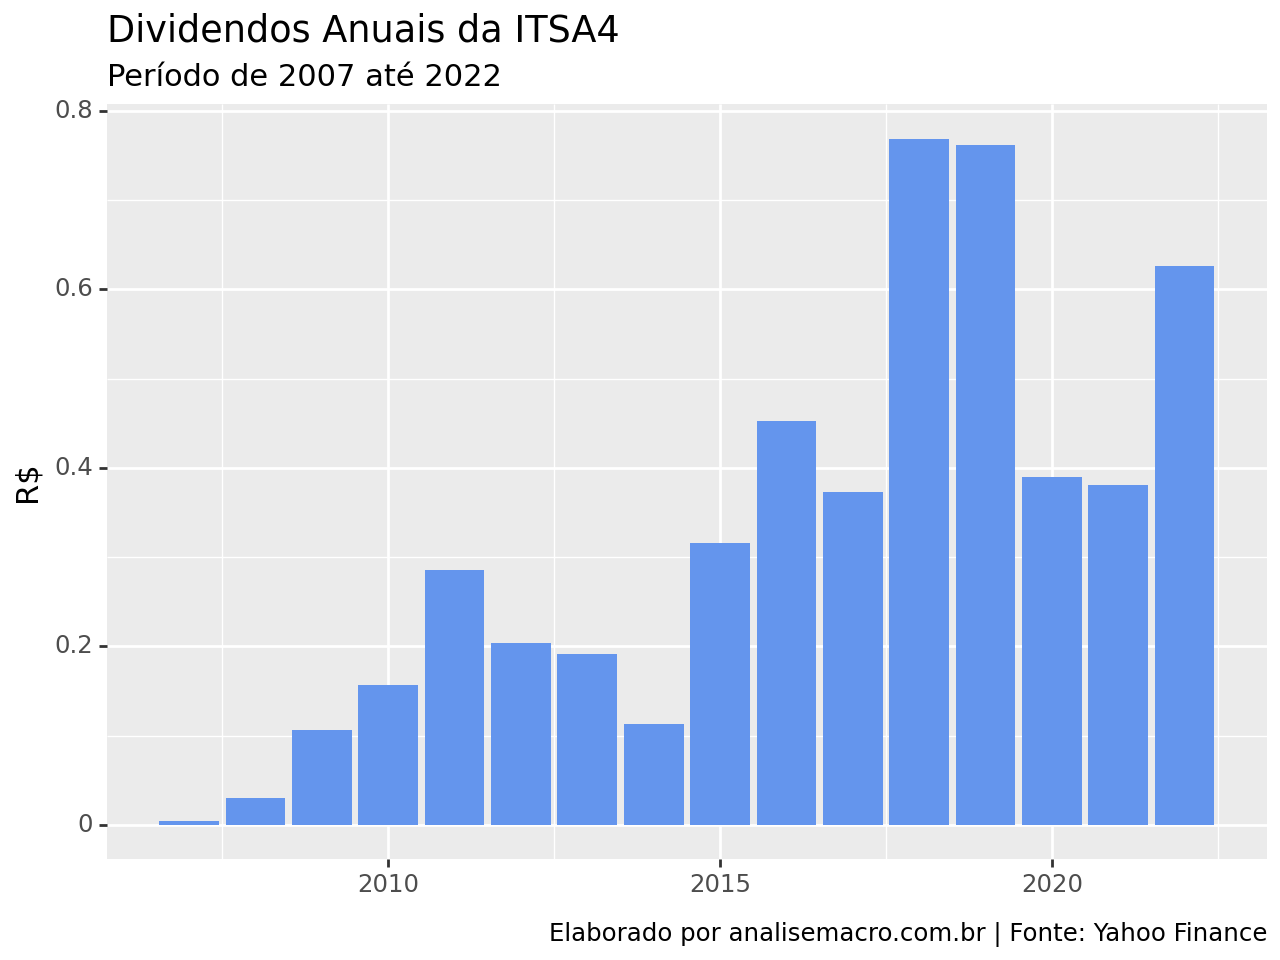

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *

anual_dividendos_reindex = anual_dividendos.reset_index()

(ggplot(anual_dividendos_reindex, aes(x = 'Year', y = "Dividends"))
  + geom_col(fill = 'cornflowerblue')
  + labs(title = 'Dividendos Anuais da ITSA4',
         subtitle = "Período de 2007 até 2022",
         caption = "Elaborado por analisemacro.com.br | Fonte: Yahoo Finance",
         x = "",
         y = "R$")
  )

In [ ]:
# Calculando o dividendo esperado (D)
D1 = anual_dividendos.mean().Dividends
D1

0.3225160625

# Calculando o preço teórico

In [ ]:
# Calculando o valor presente líquido da ação (PV)
PV = D1 / (r - g_sustainable)

# Imprimindo o resultado
print(f"Valor presente da ação {ticker}: R$ {PV:.2f}")
# Imprimindo o resultado
print(f"Valor da ação {ticker}: R$ {precos.values[0]:.2f}")

Valor presente da ação ITSA4.SA: R$ 17.87
Valor da ação ITSA4.SA: R$ 8.96
